In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy.stats import norm
from scipy.stats import chi2
from scipy.optimize import fmin_l_bfgs_b as minimizer
from scipy.special import gammaln

rnd_state = np.random.RandomState(7331)

In [2]:
Aargs = {'loc': 0,
         'scale': 2}

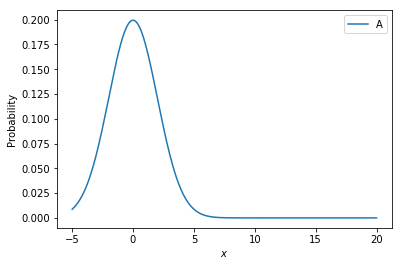

In [4]:
xspace = np.linspace(-5, 20, 1000)
fig = plt.figure()
plt.plot(xspace, norm.pdf(xspace, **Aargs), label='A')

plt.xlabel(r'$x$')
plt.ylabel(r'Probability')
plt.legend()
plt.show()

Above creates the "True" probability ditribution of the data that I am going to draw from and use.

In [ ]:
# Now pull random data from the distribution
N_A = 500
data = norm.rvs(size=N_A, **Aargs)

[ -1.10470065e-01   3.05364467e+00  -1.01717621e+00   6.63589793e-01
  -3.31659894e-02   2.19912018e+00  -3.13611292e-01   1.58836903e-01
   2.73873800e-01  -1.16935083e+00   1.05095915e+00  -1.04985279e+00
  -2.83715466e+00   8.50930215e-01  -1.55135818e-01  -3.15721277e-01
   1.43016851e+00   3.24767723e+00  -1.69163328e+00  -2.61346771e-01
  -1.45081045e+00   4.27531372e-01   9.32213566e-01   9.47990163e-01
   1.76052545e+00  -3.35648293e-01   2.36082705e-01   2.76658888e+00
  -1.14625292e+00   2.24393128e+00   1.41570226e+00  -1.71870457e+00
  -4.15409092e+00   1.21744958e+00   1.99094558e+00  -2.85033785e+00
   1.42347773e+00  -1.53994488e+00  -3.09682069e-02  -3.60229926e-01
  -5.96445252e-01  -9.49752014e-01   2.57946797e+00  -2.03502380e+00
   2.00344672e-01  -3.83255529e+00   5.46294444e-01  -9.59928236e-01
   2.67544085e+00   2.53209403e+00   2.23299461e+00   5.46643906e-03
  -2.28688994e-01  -4.31245706e-01   1.00179406e+00  -9.76886019e-02
   1.07382637e+00   7.77742475e-01

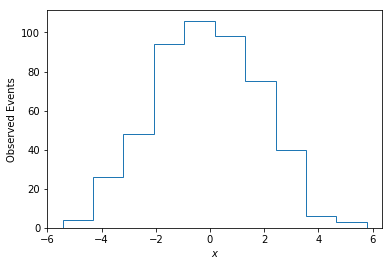

In [7]:
# Plots the randomly generated data based off the PDF

fig = plt.figure()
plt.hist(data, histtype='step')

plt.xlabel(r'$x$')
plt.ylabel(r'Observed Events')
plt.show()

Now using a second PDF to smear out the data points, to simulate the detector's inefficiencies. Once that is done, we can try the unfolding and folding methods on the smeared data to see if we can reconstruct the above dataset, the "True" data. This data is sorta? like the Monte Carlo data for FACT.

In [8]:
SmeardArg = {'loc':2,
             'scale': 5}

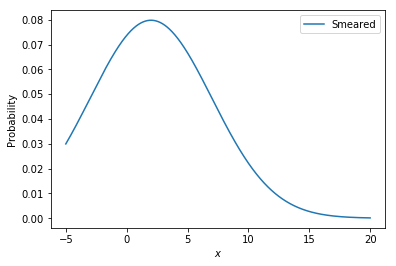

In [9]:
fig = plt.figure()
plt.plot(xspace, norm.pdf(xspace, **SmeardArg), label='Smeared')
plt.xlabel(r'$x$')
plt.ylabel(r'Probability')
plt.legend()
plt.show()

In [10]:
# Get the same amount of data points as in the True distribution
# So that the "error" can be added one by one
error = norm.rvs(size=N_A, **SmeardArg)

In [11]:
measured_distribution = data + error
print(len(measured_distribution))

500


Now trying another (more proper) way of generating the toy data based off the tasks 

In [ ]:
def toy_mc(N, x, gamma, energy_loss=1.0, threshold=1.0, smear=1.0, perfect=False, acceptance=True, num_bins=100):
    """
    Generate Toy Data for trying out the different folding and unfolding methods
    :param N: Number of "chambers" that make up the detector
    :param x: Particle Energy
    :param gamma:
    :param threshold: The threshold of the detector chambers
    :param smear: How much to smear the data points
    :param perfect: Boolean, whether the detector should be perfect or not
    :param acceptance: Boolean, whether the acceptance rate should be 1 or not
    :param num_bins: The number of bins to put the true and measured data into
    :return: Generated MC data for testing
    """
    
    if perfect:
        threshold = 0.0
        acceptance = False
        smear = 0.0 #TODO Change to correct form
    
    if acceptance:
        # Incorrect, efficiency should be a percentage, higher when particle energy is larger. This works for setting f(x)=1 if we want, but does not give value between 0 and 1 
        efficiency = 1.0 - 0.5
    else:
        efficiency = 1.0

    input_function = N*x**(-1.*gamma)
    
    binned_true_values = np.zeros(num_bins, dtype=np.int)
    
    # So, the particle should go through the series of N
    # chambers until its energy is lost, i.e. chambers could
    # represented as a list, with the list holding the total
    # value of all energy deposited into it
    # Each time the value of the energy is increased, a count
    # could be added to another array that tracks how many
    # of each energy level is added, to created the binned array
    
    chambers = np.zeros(N, dtype=np.float32)
    binned_recorded_values = np.zeros_like(binned_true_values, dtype=np.int)
    
    # Possibly use np.random.poisson for the smear for each particle interaction? 
    # If understood correctly, we assume poisson distribution for each bin, so using a possion
    # to smear work the same way?
    
    
    
    return 0

In [18]:
def is_detected(threshold, smear, particle_energy):
    energy_left = particle_energy - threshold
    if energy_left + smear > 0:
        return True

In [ ]:
def detector_interaction(particle, smear, efficiency, threshold, energy_loss):
    # General idea, still working on it
    energy_in_detector = (energy_loss + smear) * efficiency
    if energy_in_detector > threshold:
        return particle - energy_loss, energy_in_detector
    else:
        # Possiblity that the detector does not pick up the particle after the effects
        # of smearing and acceptance rate
        # So the particle still loses the constant energy, but none is recorded in the detector
        return particle - energy_loss, 0.0